# Automobile analysis and price prediction

In [ ]:

import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('Cars.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import random
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import sys
from sklearn.preprocessing import StandardScaler

### Loading the data

In [ ]:
data = pd.read_csv(r'/kaggle/input/automobile-dataset/Automobile_data.csv')

In [ ]:
data.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [ ]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Data preprocessing

### Converting '?'  to NaN

In [ ]:
data.replace('?', np.nan, inplace = True)

### Get all missing values

In [ ]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, following columns has missing values:

1) "normalized-losses": 41 missing data

2) "num-of-doors": 2 missing data

3) "bore": 4 missing data

4) "stroke" : 4 missing data

5) "horsepower": 2 missing data

6) "peak-rpm": 2 missing data

7) "price": 4 missing data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Converting object data types into numerical 

In [ ]:
data['normalized-losses']=data['normalized-losses'].astype(float)
data['bore']=data['bore'].astype(float)
data['stroke']=data['stroke'].astype(float)
data['horsepower']=data['horsepower'].astype(float)
data['peak-rpm']=data['peak-rpm'].astype(float)
data['price']=data['price'].astype(float)

### Filling missing values in "number of doors" column

In [ ]:
data[data['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [ ]:

data[(data['body-style']=='sedan')  & ((data['make']=='dodge') | (data['make']=='mazda'))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
65,0,118.0,mazda,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120.0,5000.0,19,27,18280.0
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0


From above observation we can conclude that dodge and mazda make and sedan body style vehicles has 4 number of doors.

In [ ]:
data["num-of-doors"].replace(np.nan, "four", inplace=True)

### Fill missing values in "horsepower" column

In [ ]:
data[data['horsepower'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [ ]:
data[data.columns[1:]].corr()['horsepower'][:-1]

normalized-losses    0.295772
wheel-base           0.352297
length               0.555003
width                0.642482
height              -0.110711
curb-weight          0.751034
engine-size          0.810773
bore                 0.577273
stroke               0.090254
compression-ratio   -0.205874
horsepower           1.000000
peak-rpm             0.130971
city-mpg            -0.803620
highway-mpg         -0.770908
Name: horsepower, dtype: float64

<AxesSubplot:xlabel='horsepower', ylabel='engine-size'>

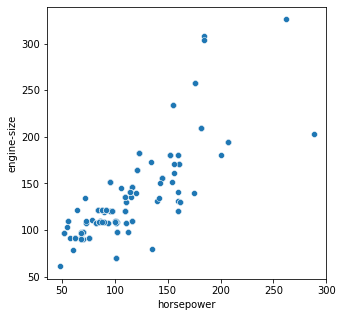

In [ ]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'horsepower', y = 'engine-size', data = data)

Engine size is highly correlated with horsepower. We can use this attribute for imputation.

For NaN values in "horsepower", engine size is 132, so we will use range between 127 and 137.

In [ ]:
data[(data['engine-size'] > 127) & (data['engine-size'] < 137)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
117,0,161.0,peugot,gas,turbo,four,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.0,142.0,5600.0,18,24,18150.0


For given range of engine size, horsepower is between range 72 to 162. This is huge difference, when we consider horsepower variance. Let's check which other attributes affect "horsepower".

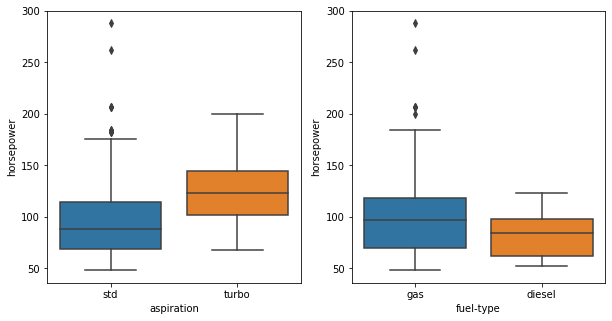

In [ ]:
features = ["aspiration","fuel-type"]
plt.figure(figsize = (10,5))
for i in enumerate (features):
    plt.subplot(1,2,i[0]+1)
    sns.boxplot(x = i[1],y = 'horsepower',data = data)

In [ ]:
data[((data['fuel-type'] == 'gas') & (data['aspiration'] == 'std')) & ((data['engine-size'] > 127) & (data['engine-size'] < 137))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895.0
191,0,NaN,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,24,13295.0


Now, for NaN values we have fuel type = gas, aspiration = std and engine size between 127 to 137, we have horsepower between 110 to 115. from observations we can impute NaN values with values between 110 to 115

In [ ]:
# from above observations replacing missing value with 112
data["horsepower"].replace(np.nan, 112, inplace=True)

### Fill missing values in "peak-rpm" column

In [ ]:
# Getting all rows with null values in 'peak-rpm' column
data[data['peak-rpm'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,112.0,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,112.0,NaN,23,31,9895.0


In [ ]:
data.iloc[130:132, 10:16]

,length,width,height,curb-weight,engine-type,num-of-cylinders
130,181.5,66.5,55.2,2579,ohc,four
131,176.8,66.6,50.5,2460,ohc,four


In [ ]:
data[data.columns[1:]].corr()['peak-rpm'][:-1]

normalized-losses    0.264597
wheel-base          -0.361052
length              -0.287325
width               -0.219957
height              -0.322272
curb-weight         -0.266306
engine-size         -0.244618
bore                -0.264269
stroke              -0.071493
compression-ratio   -0.436221
horsepower           0.130971
peak-rpm             1.000000
city-mpg            -0.113788
highway-mpg         -0.054257
Name: peak-rpm, dtype: float64

Numerical columns are not correlated with peak-rpm, therefore we can't use for prediction NaN value in peak-rpm attribute. Let's check what relation we can find with categorical attributes.

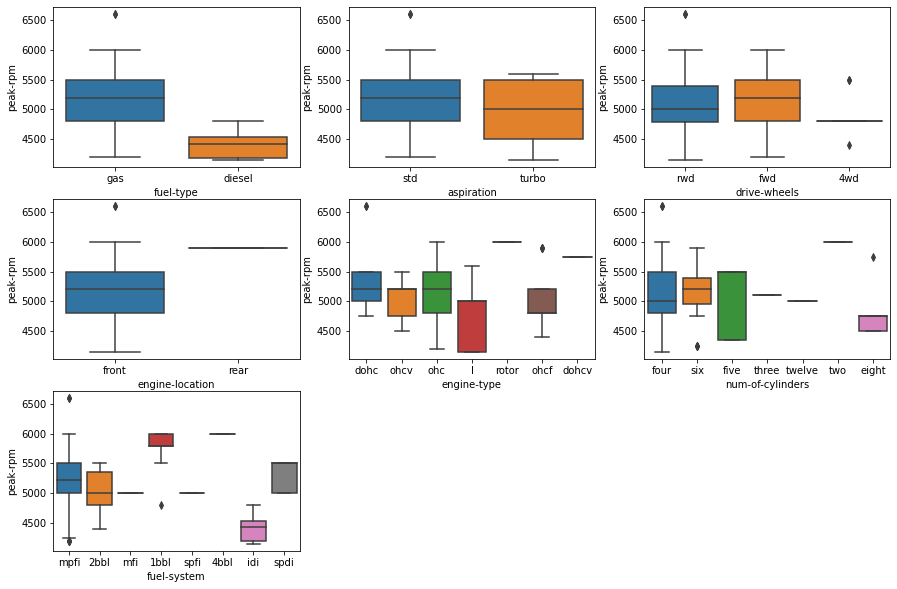

In [ ]:
features = ["fuel-type","aspiration","drive-wheels","engine-location","engine-type","num-of-cylinders","fuel-system",]
plt.figure(figsize = (15,10))
for i in enumerate (features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],y = 'peak-rpm',data = data)

1) peak rpm has only 2 missing values.

2) Above 7 caterorical attributes are same for both missing values,using these 7 attributes, it would be easy for imputation.

3) From above observation missing values would be between range 4800 to 5500. We will impute NaN value between given range by using    mode. We are using mode because peak rpm attribute is a categorical attribute.

In [ ]:
# creating dataframe by using above attributes and given range
nan_peak_rpm = data[(data['peak-rpm'] >= 4800) & (data['peak-rpm'] <= 5500) & (data['fuel-system'] == 'mpfi') & (data['engine-location'] == 'front') & (data['drive-wheels'] == 'rwd') & (data['aspiration'] == 'std') & (data['fuel-type'] == 'gas') & (data['engine-type'] == 'ohc') & (data['num-of-cylinders'] == 'four')]

In [ ]:
nan_peak_rpm['peak-rpm'].mean()

5100.0

### From above observations replacing missing value with 5100

In [ ]:
data["peak-rpm"].replace(np.nan, 5100, inplace=True)

### Fill missing values in "bore" column

In [ ]:
data[data['bore'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [ ]:
data.iloc[55:59, 10:16]

,length,width,height,curb-weight,engine-type,num-of-cylinders
55,169.0,65.7,49.6,2380,rotor,two
56,169.0,65.7,49.6,2380,rotor,two
57,169.0,65.7,49.6,2385,rotor,two
58,169.0,65.7,49.6,2500,rotor,two


In [ ]:
data['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

1) Here, for all engine type = rotor has NaN values for "bore" attributes.

2) Using domain knowledge,for rotary engine we don't have any bore and stroke, that's why for we got these attributes with NaN values. But keeping these attributes with NaN values is not a good idea. By using other attributes we will impute these values.

3) Index 55, 56, 57 are exactly same, only difference in price. But according to our data, there should be no price difference if all other attributes are same. We need to remove these duplicate entries.

In [ ]:
data.drop([55,56], axis=0, inplace=True)

In [ ]:
data[data.columns[1:]].corr()['bore'][:-1]

normalized-losses   -0.036167
wheel-base           0.490378
length               0.607480
width                0.559204
height               0.176195
curb-weight          0.649045
engine-size          0.594090
bore                 1.000000
stroke              -0.055909
compression-ratio    0.005203
horsepower           0.577439
peak-rpm            -0.264045
city-mpg            -0.594584
highway-mpg         -0.594572
Name: bore, dtype: float64

Numerical columns are less correlated with "bore". Let's check what relation we can find with categorical attributes. If categorical attributes are usefull then we will use it otherwise we will go for numerical categories for imputing missing values.

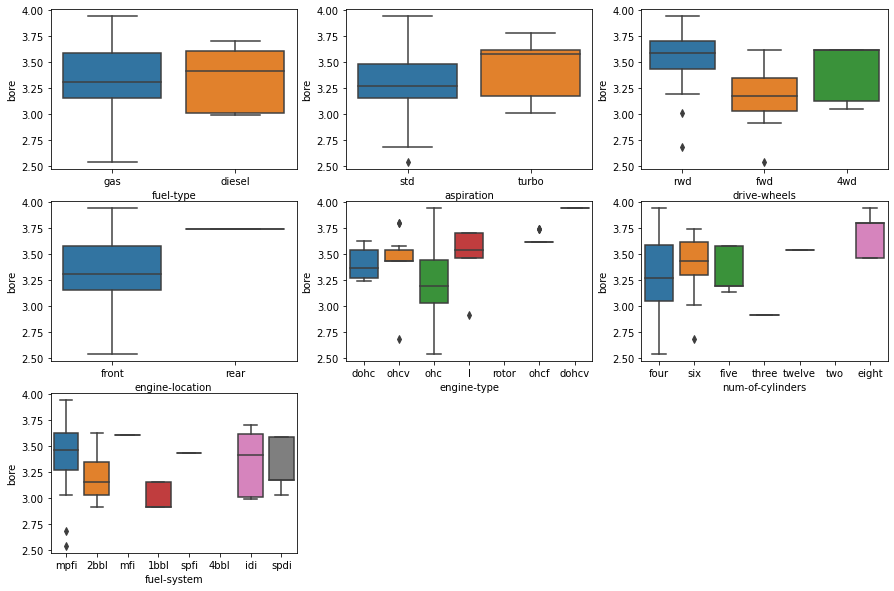

In [ ]:
features = ["fuel-type","aspiration","drive-wheels","engine-location","engine-type","num-of-cylinders","fuel-system",]
plt.figure(figsize = (15,10))
for i in enumerate (features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],y = 'bore',data = data)

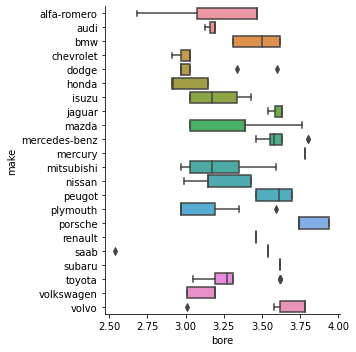

In [ ]:
sns.catplot(y="make", x="bore", kind="box", data=data)

1) By observing above plots and corrosponding values of other attributes, we can conclude that, missing values will be between 3.3 to 3.65.

2) We will impute missing value between given range by using mode. We are using mode because bore attribute is a categorical attribute. If we used average value here then it will create one more category and the difference between mean and mode here is very less.

In [ ]:
nan_bore = data[(data['bore'] >= 3.3) & (data['bore'] <= 3.65)& (data['make']=='mazda')]
nan_bore

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
59,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8845.0
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
61,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,NaN,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
64,0,115.0,mazda,gas,std,four,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,11245.0
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0


In [ ]:
nan_bore['bore'].mode()

0    3.39
dtype: float64

In [ ]:
data["bore"].replace(np.nan, 3.39, inplace=True)

### Filling missing values in "stroke" column

In [ ]:
data[data['stroke'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.39,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.39,NaN,9.4,135.0,6000.0,16,23,15645.0


In [ ]:
data[data.columns[1:]].corr()['stroke'][:-1]

normalized-losses    0.065627
wheel-base           0.161477
length               0.129739
width                0.182956
height              -0.056999
curb-weight          0.168929
engine-size          0.206675
bore                -0.055909
stroke               1.000000
compression-ratio    0.186170
horsepower           0.092337
peak-rpm            -0.070322
city-mpg            -0.042906
highway-mpg         -0.044528
Name: stroke, dtype: float64

Numerical columns are not correlated with "stroke", therefore we can't use for prediction NaN value in "stroke" attribute. Let's check what relation we can find with categorical attributes.

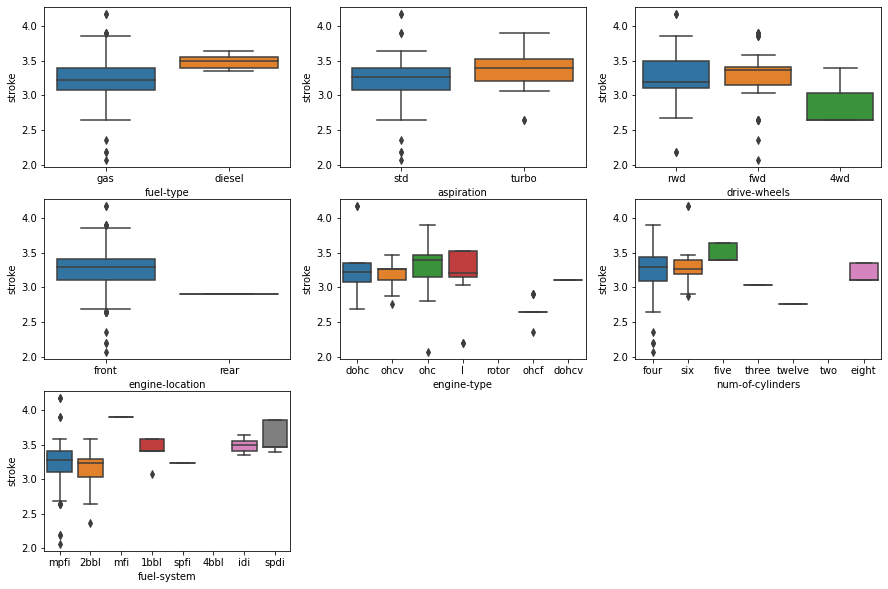

In [ ]:
features = ["fuel-type","aspiration","drive-wheels","engine-location","engine-type","num-of-cylinders","fuel-system",]
plt.figure(figsize = (15,10))
for i in enumerate (features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],y = 'stroke',data = data)

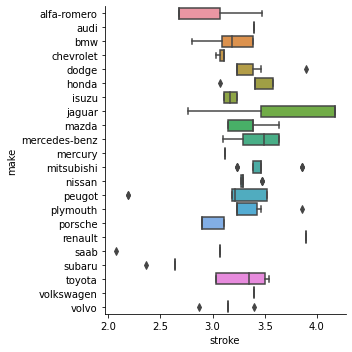

In [ ]:
sns.catplot(y="make", x="stroke", kind="box", data=data)

1) By observing above plots and corrosponding values of other attributes, we can conclude that, missing values will be between 3.1 to 3.4.

2) We will impute missing value between given range by using mode.

In [ ]:
nan_stroke = data[(data['stroke'] >= 3.1) & (data['stroke'] <= 3.4)& (data['make']=='mazda')]

In [ ]:
nan_stroke['stroke'].mode()

0    3.39
dtype: float64

In [ ]:
data["stroke"].replace(np.nan, 3.39, inplace=True)

We can also observe that bore attribute values and stroke attribute values are almost simillar, by considering this, above imputation is right.

### Filling missing values in "Normalized losses" column

In [ ]:
data[data['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [ ]:
data[data.columns[1:]].corr()['normalized-losses'][:-1]

normalized-losses    1.000000
wheel-base          -0.069276
length               0.026117
width                0.104965
height              -0.424930
curb-weight          0.122004
engine-size          0.186115
bore                -0.032582
stroke               0.070423
compression-ratio   -0.131334
horsepower           0.295418
peak-rpm             0.253048
city-mpg            -0.248245
highway-mpg         -0.200520
Name: normalized-losses, dtype: float64

1) Numerical columns are not correlated with "normalized-losses", therefore we can't use for imputing missing values in "normalized-losses" attribute.

2) Also we can't use catergorical columns because we have different categories in other attributes for all missing values in normalized categories. This condition occured because we have more number of missing values as compare to all data points.

3) We will use either mean, mode, or medain by using distribution.

In [ ]:
median = data['normalized-losses'].median()

In [ ]:
data["normalized-losses"].replace(np.nan, median, inplace=True)

### Handling missing values in "price" column

In [ ]:
data_without_price = data[data['price'].isnull()]

In [ ]:
data.dropna(subset=["price"], axis=0, inplace=True)

data.reset_index(drop=True, inplace=True)

### We have handled all the missing values. 

In [ ]:
data.isnull().values.any()

False

### Exploratory Data Analysis

### Analysis of numerical attributes

In [ ]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.819095,120.417085,98.832161,174.253266,65.890955,53.808543,2557.432161,127.447236,3.331307,3.258241,10.171960,103.507538,5108.542714,25.261307,30.763819,13225.341709
std,1.242122,32.137519,6.086686,12.373104,2.111971,2.423887,519.599899,41.359058,0.269488,0.317918,4.024401,37.562859,472.183181,6.402498,6.805338,7984.876506
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,99.500000,94.500000,166.550000,64.100000,52.000000,2157.000000,98.000000,3.150000,3.110000,8.550000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10245.000000
75%,2.000000,137.000000,102.400000,183.500000,66.750000,55.550000,2930.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16501.500000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
num_features = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']

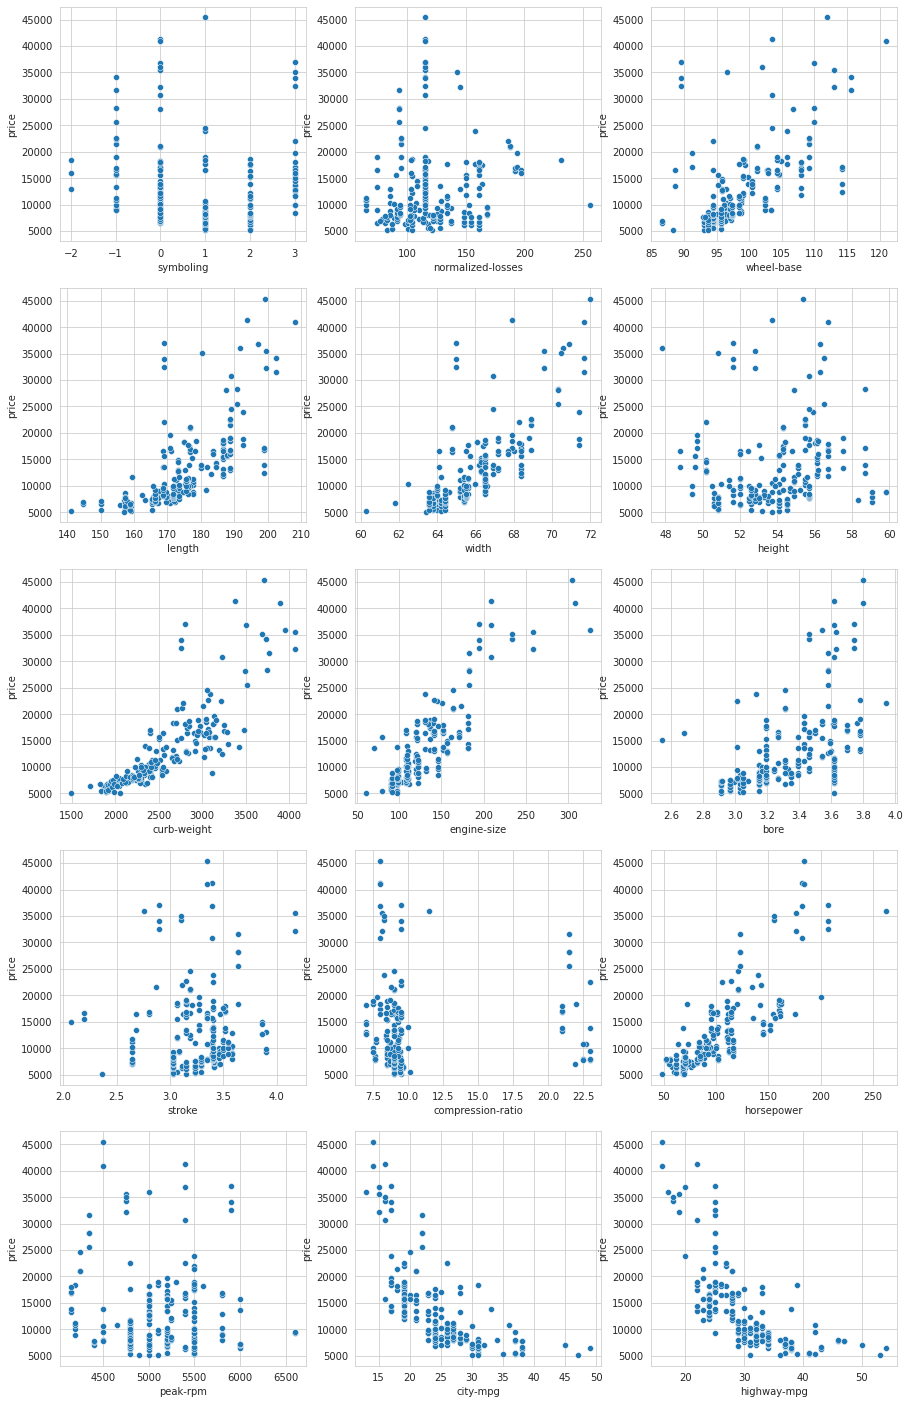

In [ ]:
plt.figure(figsize = (15,25))
for i in enumerate (num_features):
    plt.subplot(5,3,i[0]+1)
    sns.scatterplot(x = i[1],y = 'price',data = data)

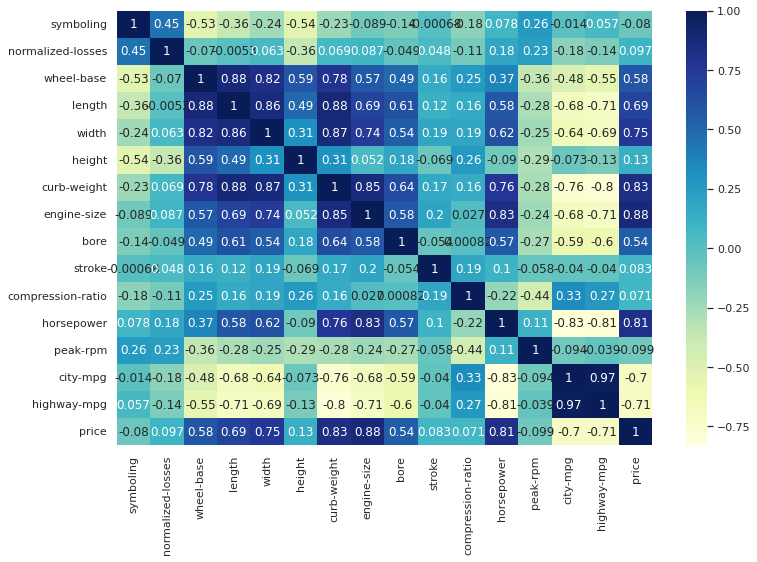

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})
dataplot = sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

### Observations from scatter plots and correlation matrix:
1) There is a positive linear relationship between price and following attributes(wheel base, length, width, curb weight, engine size, bore, horsepower). From this we can say that, when overall size and engine of vehicle increase, it's price also increase.

2) There is an inverse relationship between price and following attributes( city mpg, highway mpg). As we can see in correlation matrix almost all attributes has negative relationship with these attributes. So we can say that, when overall size of vehicle increases it,s mpg decreases.

3) Compression ratio and height attributes has very less relation with other attributes.

4) Other attributes has no relation between "price".

All above observations are only for numerical attributes. For categorical attributes we need to use box plot.

### Analysis of categorical attributes

In [ ]:
cat_features = ['fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
        'engine-type','num-of-cylinders', 'fuel-system']

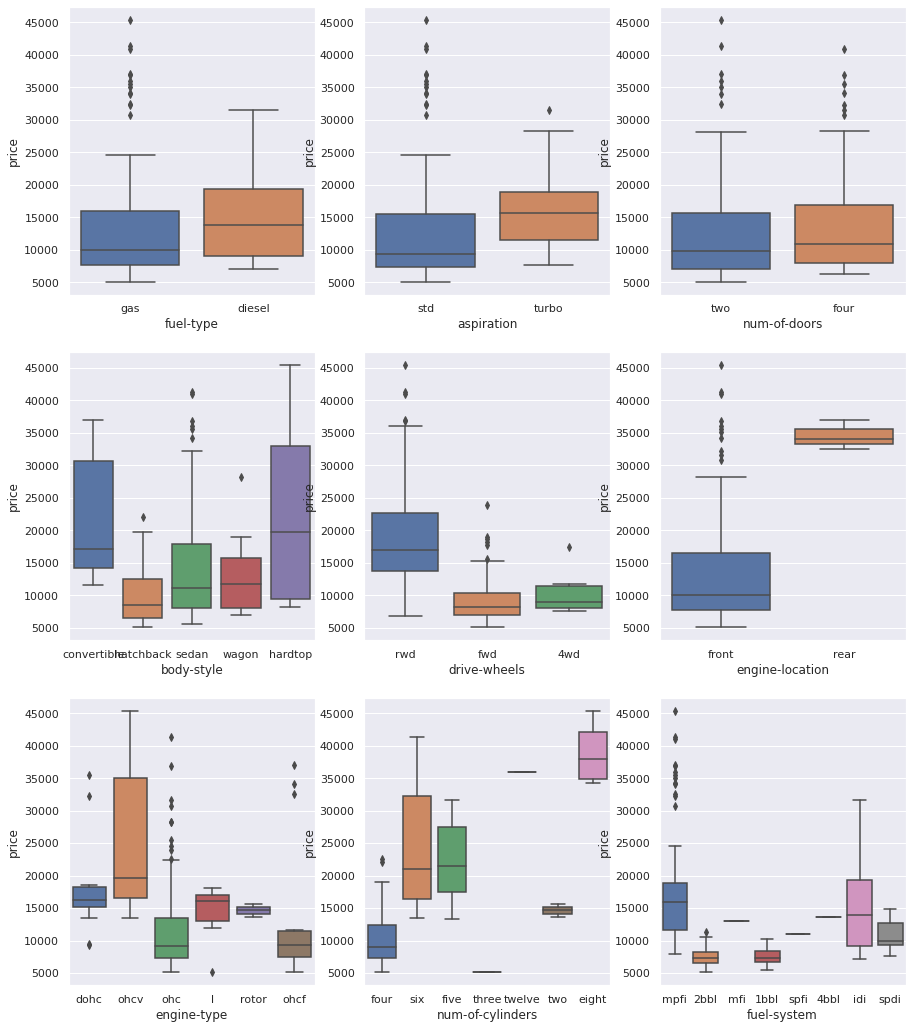

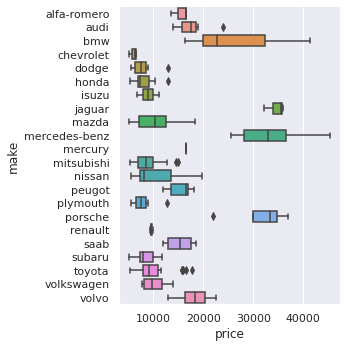

In [ ]:
plt.figure(figsize = (15,18))
for i in enumerate (cat_features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],y = 'price',data = data)
sns.catplot(y="make", x="price", kind="box", data=data)

### Observations on categorical attributes:
1) In engine location vs price box plot we can see huge price difference between front and rear engine location. This is not only because of engine location, price is affected because of make. All these rear engine location models only made by porsche and may be porsche make vehicals are costlier.

2) From above plots we observe that rear wheel drive, rear engine location, eight number of cylinders, mercedes-benz, jaguar and porsche make vehicles are costier than others.

3) We observed that data has some outliears but we are not removing it because we have very small data.

### Making data model ready 

### Encoding categorical features

In [ ]:
cat_features = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

In [ ]:
encoded_data = pd.get_dummies(data, columns = cat_features)

In [ ]:
encoded_data.shape

(199, 75)

Data points = 199

Features = 75

### Splitting data into independant and target data

In [ ]:
X = encoded_data.drop('price', axis = 1)
y = encoded_data['price']

In [ ]:
print(X.shape,y.shape)

(199, 74) (199,)


### Splitting data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 15)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(133, 74) (66, 74) (133,) (66,)


We are using 67% data points for training and 33% data points for test.

### Data Standardization

In [ ]:
scaler = StandardScaler()
std_X_train = scaler.fit_transform(X_train)
std_X_test = scaler.transform(X_test)

# Model deployment

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

## Applying Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(std_X_train, y_train)
print('train accuracy : ',lr.score(std_X_train, y_train))
print('test accuracy : ',lr.score(std_X_test, y_test))

train accuracy :  0.9739375625366756
test accuracy :  -4.0920725933565645e+23


accuracy = 1 == Best model

accuracy = 0 == simple mean model

accurcy between 0 and 1 == model is better than simple mean model

accuracy = < 0 or in -ve == model is performing worse

simple mean model = model is predicting mean value of target y, prediction for all x, model will return mean of y.

### Mean Squared Error

In [ ]:
y_pred = lr.predict(std_X_test)
print('MSE = ',mean_squared_error(y_pred, y_test))

MSE =  1.137952814999812e+31


### Plotting Residual Error

Coefficients:  [-1.08233298e+03 -3.73001639e+02  2.16159708e+03 -2.61038872e+03
  1.12883401e+03 -1.44375011e+03  4.80340411e+03  4.77668550e+03
 -9.26478255e+02 -8.54893098e+01 -4.05390458e+03 -1.39962224e+03
  1.19939691e+03 -1.05932714e+03  2.05871186e+03  5.24724217e+14
  8.20106869e+14  8.20106869e+14  6.40195719e+14  8.20106869e+14
  1.08296036e+15  5.24724217e+14  6.40195719e+14  1.13692815e+15
  9.62752722e+14  3.72449528e+14  1.08296036e+15  1.23527534e+15
  2.30980546e+15  6.40195719e+14  4.70944933e+15  5.24724217e+14
  8.20106869e+14  1.03409702e+16  1.43957375e+15  1.02513359e+15
  8.94865877e+14 -1.78635343e+15 -2.25560437e+15  3.43189458e+15
  3.43189458e+15  5.73321696e+15  5.73321696e+15 -1.74051868e+15
 -1.74051868e+15 -4.30536567e+15 -4.56471556e+15 -3.05521767e+15
 -1.04518938e+15 -3.04026893e+15 -3.01369142e+15 -7.31725615e+14
  1.43519599e+15  2.16483454e+15  8.76851358e+14  3.81608021e+15
 -8.91003353e+15  2.16483454e+15 -5.29402736e+14 -2.88800425e+15
 -4.020434

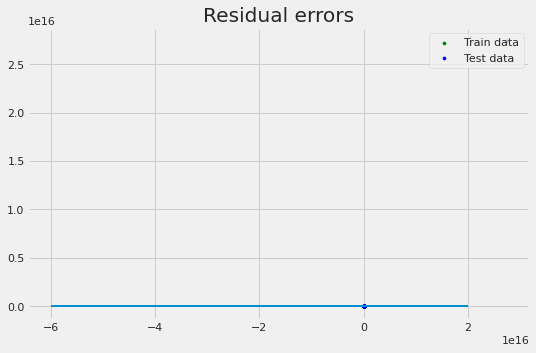

In [ ]:

print('Coefficients: ', lr.coef_)
  
print('Variance score: {}'.format(lr.score(std_X_test, y_test)))
  
plt.style.use('fivethirtyeight')

plt.figure(figsize = (8,5))
  
plt.scatter(lr.predict(std_X_train), lr.predict(std_X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
plt.scatter(lr.predict(std_X_test), lr.predict(std_X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
plt.hlines(y = 0, xmin = -60000000000000000, xmax = 20000000000000000, linewidth = 2)
  
plt.legend(loc = 'upper right')
  
plt.title("Residual errors")
  
plt.show()

Here we have got very good train accuracy = 0.97 and very bad test accuracy = -2.005. This means our model is overfitted.

Overfitting = It means that the model performs well on the training data, but it does not generalize well, means it not performs well on test data.

#### Model's performance is bad so, we are not using it.

## Applying Ridge Regression

Ridge Regressing is a modified version of Linear Regression. In ridge regression we use regularization technique.

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting

In [ ]:
reg = Ridge()
reg.fit(std_X_train, y_train)
print('train accuracy : ',reg.score(std_X_train, y_train))
print('test accuracy : ',reg.score(std_X_test, y_test))

train accuracy :  0.9723719968553692
test accuracy :  0.8830943344632624


### Mean Squared Error

In [ ]:
y_pred = reg.predict(std_X_test)
print('MSE = ',mean_squared_error(y_pred, y_test))

MSE =  3250996.363137225


### Top 10 important features

These are the features are most usefull for prediction>

In [ ]:
features = X.columns
importance = abs(reg.coef_)
imp_features = {}
for i in range(len(features)):
    imp_features[features[i]] = importance[i]
top_10 = (sorted(imp_features.items(), key=lambda x: x[1], reverse=True)[:10])
top_10

[('engine-size', 3166.600878771583),
 ('curb-weight', 2534.6110927395503),
 ('make_bmw', 1680.2822823078213),
 ('wheel-base', 1521.3404007825723),
 ('length', 1422.8106982272043),
 ('width', 1283.9986391289556),
 ('num-of-cylinders_eight', 1022.4596846751303),
 ('highway-mpg', 986.5512818274926),
 ('height', 983.4098981200374),
 ('make_audi', 980.4866940426053)]

### Plotting Residual Error

Coefficients:  [-8.60536365e+02 -3.25779208e+02  1.52134040e+03 -1.42281070e+03
  1.28399864e+03 -9.83409898e+02  2.53461109e+03  3.16660088e+03
 -2.35276965e+02 -4.66762771e+02 -8.30006425e+02  6.01517577e+02
  7.59043774e+02 -4.19500409e+02  9.86551282e+02  2.94179685e+01
  9.80486694e+02  1.68028228e+03 -4.46444823e+02 -4.96411071e+02
 -6.46962578e+02 -2.91741627e+02  3.94011183e+02  1.47514970e+02
  6.99024295e+02 -2.54843735e+02 -7.06838418e+02 -1.74155034e+02
 -3.59228071e+02 -5.23351582e+02  6.24412082e+02 -1.34228898e+02
  9.75705723e+02 -3.95174652e+02 -5.38950939e+02  3.68612320e+02
 -3.30007605e+02  2.07475785e+02 -2.07475785e+02 -4.46242444e+02
  4.46242444e+02 -2.29969684e+02  2.29969684e+02  6.22876407e+02
  2.17899485e+02 -3.82542085e+02  2.01551824e+01  2.99797755e+01
  2.42694060e+02 -3.89545048e+02  3.08810799e+02 -6.24412082e+02
  6.24412082e+02 -9.77824437e-01 -1.66397620e+02  3.59026433e+02
  1.69671849e+01 -6.18522153e+02  2.94789377e+02  1.02245968e+03
 -5.984273

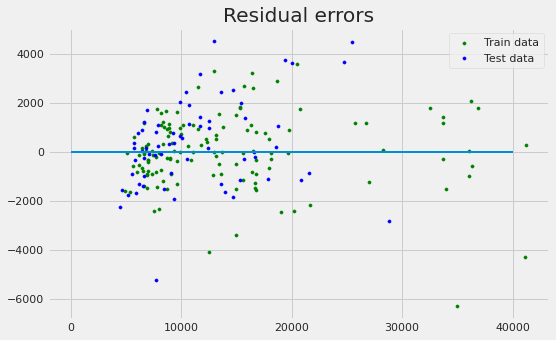

In [ ]:

print('Coefficients: ', reg.coef_)
  
print('Variance score: {}'.format(reg.score(std_X_test, y_test)))
  
plt.figure(figsize = (8,5))  
plt.style.use('fivethirtyeight')
  
plt.scatter(reg.predict(std_X_train), reg.predict(std_X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
plt.scatter(reg.predict(std_X_test), reg.predict(std_X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
plt.hlines(y = 0, xmin = 0, xmax = 40000, linewidth = 2)
  
plt.legend(loc = 'upper right')
  
plt.title("Residual errors")
plt.show()

We got train accuracy = 0.97 and train accuracy = 0.88. We can observe that accuracy is improved.

To increase accuracy and generalize model well, we use cross-validation and hyperparameter tunning technique. But here we have very less data, so we are not doing it here. 

## Applying Lasso Regression

Ridge and Lasso regressions are almost similar and only difference is Ridge regression uses L2 regularization and Lasso regression uses L1 regularization.

The differences between L1 and L2 regularization:
L1 regularization penalizes the sum of absolute values of the weights, whereas L2 regularization penalizes the sum of squares of the weights

In [ ]:
lasso = Lasso()
lasso.fit(std_X_train, y_train)
print('train accuracy : ',lasso.score(std_X_train, y_train))
print('test accuracy : ',lasso.score(std_X_test, y_test))

train accuracy :  0.9741378641878523
test accuracy :  0.8220530849480437


### Mean squared error

In [ ]:
y_pred = lasso.predict(std_X_test)
print('MSE = ',mean_squared_error(y_pred, y_test))

MSE =  4948475.088947709


### Plotting Residual Error

Coefficients:  [-1.05496596e+03 -3.26137470e+02  1.97226763e+03 -2.42196826e+03
  1.15174559e+03 -1.32850645e+03  4.53962011e+03  4.66549361e+03
 -8.50860333e+02 -1.93534210e+02 -3.04281338e+03 -1.01053728e+03
  1.08044701e+03 -9.87005990e+02  1.93108634e+03  1.31964020e+02
  1.42110565e+03  2.03725275e+03 -3.78967505e+02 -5.54495732e+02
 -6.10927225e+02 -2.50591151e+02 -2.32930083e+02  3.95077676e+02
  8.81826921e+02  1.65526385e-01 -7.14057284e+02  1.79740533e+02
 -2.89805358e+02 -5.60758283e+02  2.42340586e+03  3.47965310e+00
  1.50029329e+03  0.00000000e+00 -2.06990930e+02  7.93686555e+02
 -4.53634130e+01  2.30254214e+03 -1.48305762e-13 -1.10948394e+03
  0.00000000e+00 -4.70804970e+02  4.74116853e-11  5.55359158e+02
  2.61414729e+02 -5.17384833e+02 -0.00000000e+00  6.45494577e+01
  6.43744910e+01 -7.52643220e+02  0.00000000e+00 -8.10579253e+01
  3.99613509e-14  1.29978349e+02 -4.11360488e+02 -0.00000000e+00
  0.00000000e+00 -6.12746306e+02  8.95168308e+02  4.15177463e+02
 -8.664859

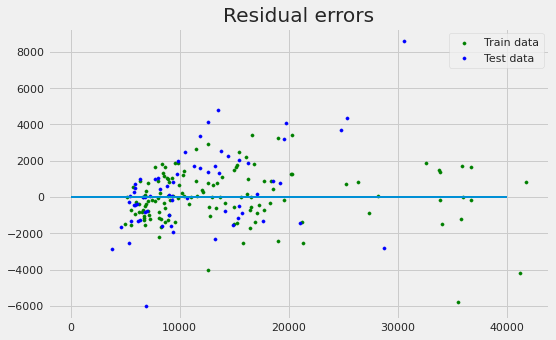

In [ ]:

print('Coefficients: ', lasso.coef_)
  
print('Variance score: {}'.format(lasso.score(std_X_test, y_test)))
  
plt.figure(figsize = (8,5))    
plt.style.use('fivethirtyeight')
  
plt.scatter(lasso.predict(std_X_train), lasso.predict(std_X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
plt.scatter(lasso.predict(std_X_test), lasso.predict(std_X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
plt.hlines(y = 0, xmin = 0, xmax = 40000, linewidth = 2)
  
plt.legend(loc = 'upper right')
  
plt.title("Residual errors")
  
plt.show()

For Lasso model we got train accuracy = 0.97 and test accuracy = 0.82 which is less than Ridge regression.

Here we are not getting accuracy more than 90% for linear regression models. May be this is because data is not linearly separable.


## Applying Support Vector Regressor

Polynomial Kernel: It represents the similarity of vectors in the training set of data in a feature space over polynomials of the original variables used in the kernel.

In [ ]:
poly = SVR(kernel = 'poly', degree = 3 ,C=1.0)
poly.fit(std_X_train, y_train)
print('train accuracy : ',poly.score(std_X_train, y_train))
print('test accuracy : ',poly.score(std_X_test, y_test))

train accuracy :  -0.1293176566264247
test accuracy :  0.0004945800803959344


### Mean squared error

In [ ]:
y_pred = poly.predict(std_X_test)
print('MSE = ',mean_squared_error(y_pred, y_test))

MSE =  27794961.605803937


### Plotting Residual Error

Variance score: 0.0004945800803959344


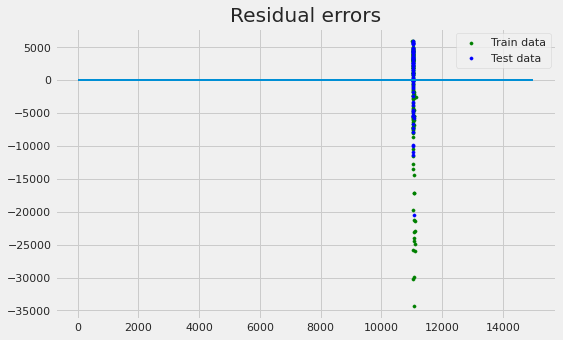

In [ ]:

print('Variance score: {}'.format(poly.score(std_X_test, y_test)))
  
plt.figure(figsize = (8,5))    
plt.style.use('fivethirtyeight')
  
plt.scatter(poly.predict(std_X_train), poly.predict(std_X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
plt.scatter(poly.predict(std_X_test), poly.predict(std_X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 15000, linewidth = 2)
  
plt.legend(loc = 'upper right')
  
plt.title("Residual errors")
  
plt.show()

For SVR model we got train accuracy = -0.126 and test accuracy = 0.00049 which is less than Ridge and Lasso regression.

# Comparing all models

In [ ]:

from prettytable import PrettyTable
from prettytable import ALL as ALL
table=PrettyTable(hrules=ALL)
table.field_names = ["Sr.No.", "Model", "Train accuracy", "Test accuracy", "MSE"] 
table.add_row([1, "Linear Regression", 0.974 , -2.005e+23, 5.57e+30 ])
table.add_row([2, "Ridge Regression", 0.972 , 0.883, 3250996.36 ])
table.add_row([3, "Lasso Regression", 0.974 , 0.822, 4948475.08 ])
table.add_row([4, "Polynomial SVR", -0.12 , 0.00049, 27794961.60 ])

print(table)

+--------+-------------------+----------------+---------------+------------+
| Sr.No. |       Model       | Train accuracy | Test accuracy |    MSE     |
+--------+-------------------+----------------+---------------+------------+
|   1    | Linear Regression |     0.974      |   -2.005e+23  |  5.57e+30  |
+--------+-------------------+----------------+---------------+------------+
|   2    |  Ridge Regression |     0.972      |     0.883     | 3250996.36 |
+--------+-------------------+----------------+---------------+------------+
|   3    |  Lasso Regression |     0.974      |     0.822     | 4948475.08 |
+--------+-------------------+----------------+---------------+------------+
|   4    |   Polynomial SVR  |     -0.12      |    0.00049    | 27794961.6 |
+--------+-------------------+----------------+---------------+------------+


By comparing above models Ridge Regression got high accuracy.

### Deploying new model by dropping less important features

Now, we have got best model for price prediction. But here we have considered all attributes. For models like linear regression we should not consider attributes which are correlated to each other, numerical attributes which are  non linearly related to our target attribute and categorical attributes which are not seperable with target variable.


### Non linear relation

<AxesSubplot:xlabel='symboling', ylabel='price'>

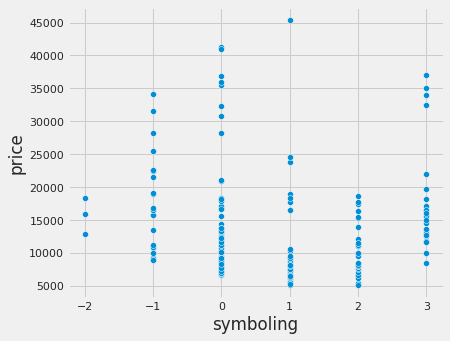

In [ ]:
plt.figure(figsize = (6,5))
sns.scatterplot(x = 'symboling',y = 'price',data = data)

### Positive linear relation

<AxesSubplot:xlabel='engine-size', ylabel='price'>

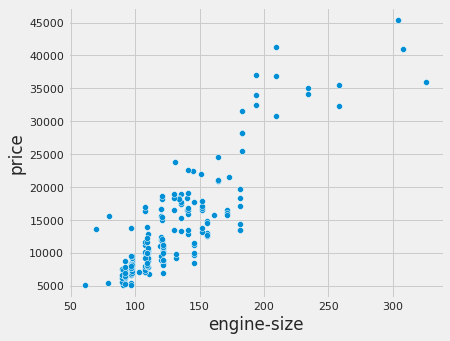

In [ ]:
plt.figure(figsize = (6,5))
sns.scatterplot(x = 'engine-size',y = 'price',data = data)

### Negative linear relation

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

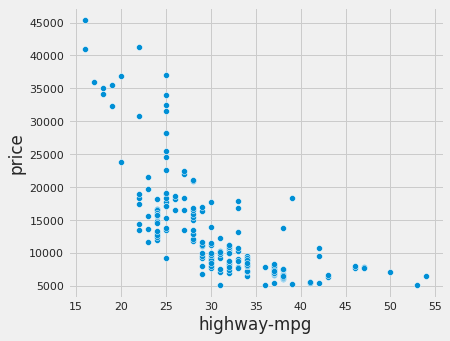

In [ ]:
plt.figure(figsize = (6,5))
sns.scatterplot(x = 'highway-mpg',y = 'price',data = data)

### Non seperable relation

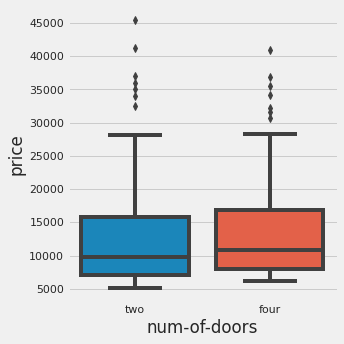

In [ ]:
sns.catplot(x="num-of-doors", y="price", kind="box", data=data)

Here we can see that price of 2 doors and 4 doors are overlaping. Means we can not predict price of vehicle by using this feature.

### Seperable Relation

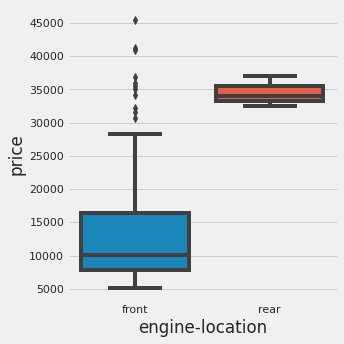

In [ ]:
sns.catplot(x="engine-location", y="price", kind="box", data=data)

Here we can clearly see that price of front engine location is between 7500 to 16000 and price of rear engine lication vehicle is between 33000 to 36000, we can seperate these two categories easily. This kind of attributes are very usefull for prediction.

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})
dataplot = sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

NameError: name 'sns' is not defined

Right side we can see scale from 0 to 1. 0 means not coreelated 1 means highly positive correlated and -ve means negative correlated.

Wheel base and length features shows 0.88 correlated means these two are highly correlated. We can drop one of these columns.

Now, by using scatter plot, box plot and correlation matrix we will drop less important features and build model and check it's accuracy. If accuracy is approximate equal we will select model which has less features.

## Drop features / columns

In [ ]:
drop_columns = ['symboling', 'normalized-losses','height','stroke','compression-ratio','peak-rpm','city-mpg','curb-weight','length','num-of-doors']

In [ ]:
new_data = data.drop(drop_columns, axis = 1)

In [ ]:
new_data.head(2)

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,width,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,highway-mpg,price
0,alfa-romero,gas,std,convertible,rwd,front,88.6,64.1,dohc,four,130,mpfi,3.47,111.0,27,13495.0
1,alfa-romero,gas,std,convertible,rwd,front,88.6,64.1,dohc,four,130,mpfi,3.47,111.0,27,16500.0


In [ ]:
new_cat_features = ['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

In [ ]:
new_encoded_data = pd.get_dummies(new_data, columns = new_cat_features)

In [ ]:
new_encoded_data.shape

(199, 64)

In [ ]:
X = new_encoded_data.drop('price', axis = 1)
y = new_encoded_data['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 15)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(133, 63) (66, 63) (133,) (66,)


## Data Standardization

In [ ]:
scaler = StandardScaler()
std_X_train = scaler.fit_transform(X_train)
std_X_test = scaler.transform(X_test)

## Applying Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(std_X_train, y_train)
print('train accuracy : ',lr.score(std_X_train, y_train))
print('test accuracy : ',lr.score(std_X_test, y_test))

train accuracy :  0.9641697126406666
test accuracy :  0.8716189902578487


## Mean Squared Error

In [ ]:
y_pred = lr.predict(std_X_test)
print('MSE = ',mean_squared_error(y_pred, y_test))

MSE =  3570110.9424543763


### Top 10 important features

In [ ]:
features = X.columns
importance = abs(lr.coef_)
imp_features = {}
for i in range(len(features)):
    imp_features[features[i]] = importance[i]
top_10 = (sorted(imp_features.items(), key=lambda x: x[1], reverse=True)[:10])
top_10

[('engine-size', 2968.295724885096),
 ('horsepower', 2033.4413472301871),
 ('make_bmw', 1836.2421678532692),
 ('width', 1312.6076989348994),
 ('wheel-base', 1070.1142766241987),
 ('num-of-cylinders_eight', 876.843050916949),
 ('make_jaguar', 819.0907226967732),
 ('make_mercedes-benz', 805.0384356086635),
 ('body-style_convertible', 767.2364650452523),
 ('bore', 710.7110949083028)]

## Applying Ridge Regression

In [ ]:
reg = Ridge()
reg.fit(std_X_train, y_train)
print('train accuracy : ',reg.score(std_X_train, y_train))
print('test accuracy : ',reg.score(std_X_test, y_test))

train accuracy :  0.9640151264783446
test accuracy :  0.8709536292254477


## Mean Squared Error

In [ ]:
y_pred = reg.predict(std_X_test)
print('MSE = ',mean_squared_error(y_pred, y_test))

MSE =  3588613.777937822


### Top 10 important features

In [ ]:
features = X.columns
importance = abs(reg.coef_)
imp_features = {}
for i in range(len(features)):
    imp_features[features[i]] = importance[i]
top_10 = (sorted(imp_features.items(), key=lambda x: x[1], reverse=True)[:10])
top_10

[('engine-size', 2428.355167960619),
 ('horsepower', 1884.2086927610646),
 ('make_bmw', 1760.2773994387182),
 ('width', 1316.007682717983),
 ('num-of-cylinders_eight', 1103.6678199117262),
 ('wheel-base', 1058.4906693988125),
 ('make_jaguar', 885.4569874560001),
 ('make_mercedes-benz', 796.5997043959189),
 ('body-style_convertible', 747.1014192690619),
 ('engine-location_rear', 609.5073398369997)]

## Applying Lasso Regression

In [ ]:
lasso = Lasso()
lasso.fit(std_X_train, y_train)
print('train accuracy : ',lasso.score(std_X_train, y_train))
print('test accuracy : ',lasso.score(std_X_test, y_test))

train accuracy :  0.9641664385148627
test accuracy :  0.854505347503355


## Mean Squared Error

In [ ]:
y_pred = lasso.predict(std_X_test)
print('MSE = ',mean_squared_error(y_pred, y_test))

MSE =  4046019.36057467


## Apply support vector regressor

In [ ]:
poly = SVR(kernel = 'poly', degree = 3 ,C=1.0)
poly.fit(std_X_train, y_train)
print('train accuracy : ',poly.score(std_X_train, y_train))
print('test accuracy : ',poly.score(std_X_test, y_test))

train accuracy :  -0.12893201756023198
test accuracy :  0.00029524018321958057


## Mean Squared Error

In [ ]:
y_pred = poly.predict(std_X_test)
print('MSE = ',mean_squared_error(y_pred, y_test))

MSE =  27800504.992240965


## Compare model after removing less important features

In [ ]:

from prettytable import PrettyTable
from prettytable import ALL as ALL
table=PrettyTable(hrules=ALL)
table.field_names = ["Sr.No.", "Model", "Train accuracy", "Test accuracy", "MSE"] 
table.add_row([1, "Linear Regression", 0.964 , 0.871, 3570110.94 ])
table.add_row([2, "Ridge Regression", 0.964 , 0.870, 3588613.77 ])
table.add_row([3, "Lasso Regression", 0.964 , 0.854, 4046019.36 ])
table.add_row([4, "Polynomial SVR", -0.128 , 0.00029, 27800504.99 ])

print(table)

+--------+-------------------+----------------+---------------+-------------+
| Sr.No. |       Model       | Train accuracy | Test accuracy |     MSE     |
+--------+-------------------+----------------+---------------+-------------+
|   1    | Linear Regression |     0.964      |     0.871     |  3570110.94 |
+--------+-------------------+----------------+---------------+-------------+
|   2    |  Ridge Regression |     0.964      |      0.87     |  3588613.77 |
+--------+-------------------+----------------+---------------+-------------+
|   3    |  Lasso Regression |     0.964      |     0.854     |  4046019.36 |
+--------+-------------------+----------------+---------------+-------------+
|   4    |   Polynomial SVR  |     -0.128     |    0.00029    | 27800504.99 |
+--------+-------------------+----------------+---------------+-------------+


Comparing above models Linear and Ridge Regression got almost equal accuracy, we can use either of them.

## Let's compare accuracy of models with all features and accuracy of models after removing less important features

In [ ]:
table1=PrettyTable(hrules=ALL)
table1.field_names = ["Sr.No.", "Model", "Train accuracy", "Test accuracy", "MSE"] 
table1.add_row([1, "Linear Regression", 0.974 , -2.005e+23, 5.57e+30 ])
table1.add_row([2, "Ridge Regression", 0.972 , 0.883, 3250996.36 ])
table1.add_row([3, "Lasso Regression", 0.974 , 0.822, 4948475.08 ])
table1.add_row([4, "Polynomial SVR", -0.12 , 0.00049, 27794961.60 ])
print('Accuracy of models with all features')
print(table1)
table2=PrettyTable(hrules=ALL)
table2.field_names = ["Sr.No.", "Model", "Train accuracy", "Test accuracy", "MSE"] 
table2.add_row([1, "Linear Regression", 0.964 , 0.871, 3570110.94 ])
table2.add_row([2, "Ridge Regression", 0.964 , 0.870, 3588613.77 ])
table2.add_row([3, "Lasso Regression", 0.964 , 0.854, 4046019.36 ])
table2.add_row([4, "Polynomial SVR", -0.128 , 0.00029, 27800504.99 ])
print('Accuracy of models after removing less important features')
print(table2)

Accuracy of models with all features
+--------+-------------------+----------------+---------------+------------+
| Sr.No. |       Model       | Train accuracy | Test accuracy |    MSE     |
+--------+-------------------+----------------+---------------+------------+
|   1    | Linear Regression |     0.974      |   -2.005e+23  |  5.57e+30  |
+--------+-------------------+----------------+---------------+------------+
|   2    |  Ridge Regression |     0.972      |     0.883     | 3250996.36 |
+--------+-------------------+----------------+---------------+------------+
|   3    |  Lasso Regression |     0.974      |     0.822     | 4948475.08 |
+--------+-------------------+----------------+---------------+------------+
|   4    |   Polynomial SVR  |     -0.12      |    0.00049    | 27794961.6 |
+--------+-------------------+----------------+---------------+------------+
Accuracy of models after removing less important features
+--------+-------------------+----------------+-----------

After comparing both Ridge Regression model we can see only 1.13% accuracy difference. Hence We can use 2nd Ridge Regression model (model trained on data after removing less important features).

We have trained models on train set and checked it's accuracy on test set and we have got best model.

###  Checking accuracy of selected model for all dataset using cross validation

In [ ]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(Ridge(), std_X, y, cv=cv)

array([0.8604188 , 0.94006844, 0.94474269, 0.91123001, 0.88795189])

Average accuracy of cross validation models is 90 %, which is very good. 

## Finally we can use Ridge Regression model as a final model for price prediction.

# Building pipeline for price prediction

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Input=[('scale',StandardScaler()), ('model',Ridge())]

In [ ]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', Ridge())])

In [ ]:
pipe.fit(X, y)
print('train accuracy : ',pipe.score(X, y))

train accuracy :  0.9580734059346432


# Price prediction function

In [ ]:
def predict_price(wheel_base, width,engine_size, bore,horsepower,highway_mpg,make,fuel,aspiration,
                  body_style,drive_wheels,engine_location,num_of_cylinders,fuel_system):    
    loc_index = np.where(X.columns==make)[0][0]
    loc_index = np.where(X.columns==fuel)[0][0]
    loc_index = np.where(X.columns==aspiration)[0][0]
    loc_index = np.where(X.columns==body_style)[0][0]
    loc_index = np.where(X.columns==drive_wheels)[0][0]
    loc_index = np.where(X.columns==engine_location)[0][0]
    loc_index = np.where(X.columns==num_of_cylinders)[0][0]
    loc_index = np.where(X.columns==fuel_system)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = wheel_base
    x[1] = width
    x[2] = engine_size
    x[3] = bore
    x[4] = horsepower
    x[5] = highway_mpg
    if loc_index >= 0:
        x[loc_index] = 1

    return pipe.predict([x])[0]

In [ ]:
predict_price(90, 80,150, 3.50,120,25,'make_saab','fuel-type_gas','aspiration_std','body-style_sedan','drive-wheels_fwd','engine-location_front',
       'num-of-cylinders_four','fuel-system_4bbl')

28788.014498743287

# Conclusion:

Comparing these four models, we conclude that the Ridge Regression model is the best model to be able to predict price from our dataset.
